## Inference

In [ ]:
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image
from Autoencoder import Autoencoder
import yaml
import os

# Instantiate the model and set to eval mode
model = Autoencoder()

# Load model.pth if exists
try:
	model.load_state_dict(torch.load("model.pth"))
except FileNotFoundError:
	print("No model.pth found")
model.eval()

# Define a transform to preprocess the image
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# Load data path
with open("../config.yml", "r") as file:
	config = yaml.safe_load(file)
	data_path = config["dataset_path"]

# Load and preprocess the image
image = Image.open(os.path.join(data_path, "CrossValidation/Annotated/B22-25_0/02816.png"))
# TODO: remove alpha channel
input_image = transform(image).unsqueeze(0) # Add batch dimension
print(input_image.shape)

torch.Size([1, 4, 256, 256])


In [ ]:
# Perform a forward pass to get the reconstructed image
with torch.no_grad():
    reconstructed_image = model(input_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


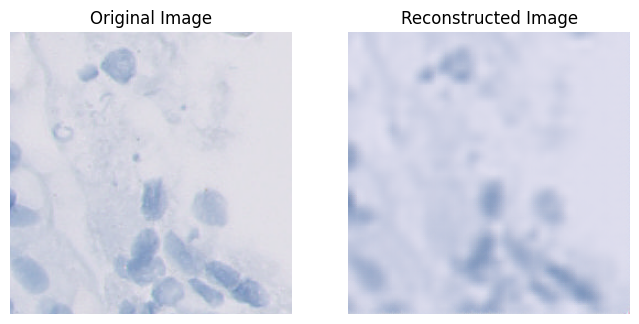

In [9]:
# Convert tensors to images for visualization
input_image_np = input_image.squeeze(0).permute(1, 2, 0).numpy()
reconstructed_image_np = reconstructed_image.squeeze(0).permute(1, 2, 0).numpy()#*255

# Display the original and reconstructed images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(input_image_np)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Reconstructed Image")
plt.imshow(reconstructed_image_np)
plt.axis("off")

plt.show()

In [7]:
reconstructed_image_np.shape

(256, 256, 4)